In [2]:
# pip install pandas numpy matplotlib scikit-learn seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constante do Endereço dos dados
ENDERECO_DADOS = 'https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv'
#ENDERECO_DADOS = r'./dados/BaseDPEvolucaoMensalCisp.csv'

# obter dados do CSV e do MySQL
try:
    print('Obtendo dados de ocorrências...')

    df_ocorrencias = pd.read_csv(ENDERECO_DADOS, sep=';', encoding='iso-8859-1')

    # filtrar ano de 2021 a 2023
    # df_ocorrencias = df_ocorrencias[(df_ocorrencias['ano'] >= 2020) & (df_ocorrencias['ano'] <= 2023)]

    # delimitar somente as variáveis necessárias
    df_veiculos = df_ocorrencias[['cisp','roubo_veiculo','recuperacao_veiculos']]

    #totalizar
    df_total_veiculos = df_veiculos.groupby('cisp').sum(['roub_veiculo','recuperacao_veiculos']).reset_index()

    print(df_total_veiculos)

    print('Dados obtidos com sucesso!')
except Exception as e:
    print('Erro ao obter dados: ', e)

Obtendo dados de ocorrências...
     cisp  roubo_veiculo  recuperacao_veiculos
0       1            548                   527
1       4           2133                  1872
2       5           1253                  1513
3       6           4332                  7768
4       7           1970                  1778
..    ...            ...                   ...
133   159            279                   322
134   165            500                   621
135   166            965                  1444
136   167            104                   386
137   168             59                   159

[138 rows x 3 columns]
Dados obtidos com sucesso!


In [4]:
# Correlação
try:
    array_roubo_veiculo = np.array(df_total_veiculos['roubo_veiculo'])
    array_recuperacao_veiculos = np.array(df_total_veiculos['recuperacao_veiculos'])

    # cálculo da correlação
    correlacao = np.corrcoef(array_roubo_veiculo,array_recuperacao_veiculos)[0,1]

    print('Correlação: ', correlacao)

except Exception as e:
    print('Erro ao correlacionar: ', e) 

Correlação:  0.9305805299331205


In [9]:
#Regressão linear simples
# Prever recuperações de veículos a partir dos roubos de veículos
# y = Recuperações
# x = roubo
try:
    # classe para dividir os dados em treino e teste
    from sklearn.model_selection import train_test_split

    # dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        array_roubo_veiculo, # variável independente
        array_recuperacao_veiculos, # variável dependente
        test_size=0.2, # Tamanho do teste
        random_state=42
    )

    # normalização da escala dos dados
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train.reshape(-1,1))
    X_test = scaler.transform(X_test.reshape(-1,1))

    # classe para criação do modelo de regressão linear
    from sklearn.linear_model import LinearRegression

    # modelo é responsável pela criação da função linear - y=ax+b
    modelo = LinearRegression()

    # treino
    modelo.fit(X_train, y_train)

    # avaliar o modelo  - r2_score
    r2_score = modelo.score(X_test, y_test)

    print('Score: ', r2_score)
    
    # array de dados de roubo para prever
    array_roubo_veiculo_pred = np.array([400000, 450000, 500000, 550000, 600000])

    # normalizar a escala
    array_roubo_veiculo_pred_scaled = scaler.transform(
                                            array_roubo_veiculo_pred.reshape(-1,1)
                                            )

    # realizar a predição
    recup_pred = modelo.predict(array_roubo_veiculo_pred_scaled)

    print('Previsão de recuperações de veículos: ', recup_pred)
except Exception as e:
    print('Erro ao ao realizar a análise preditva: ', e) 

Score:  0.8784527330939058
Previsão de recuperações de veículos:  [283049.9846101  318400.99457702 353752.00454394 389103.01451086
 424454.02447778]


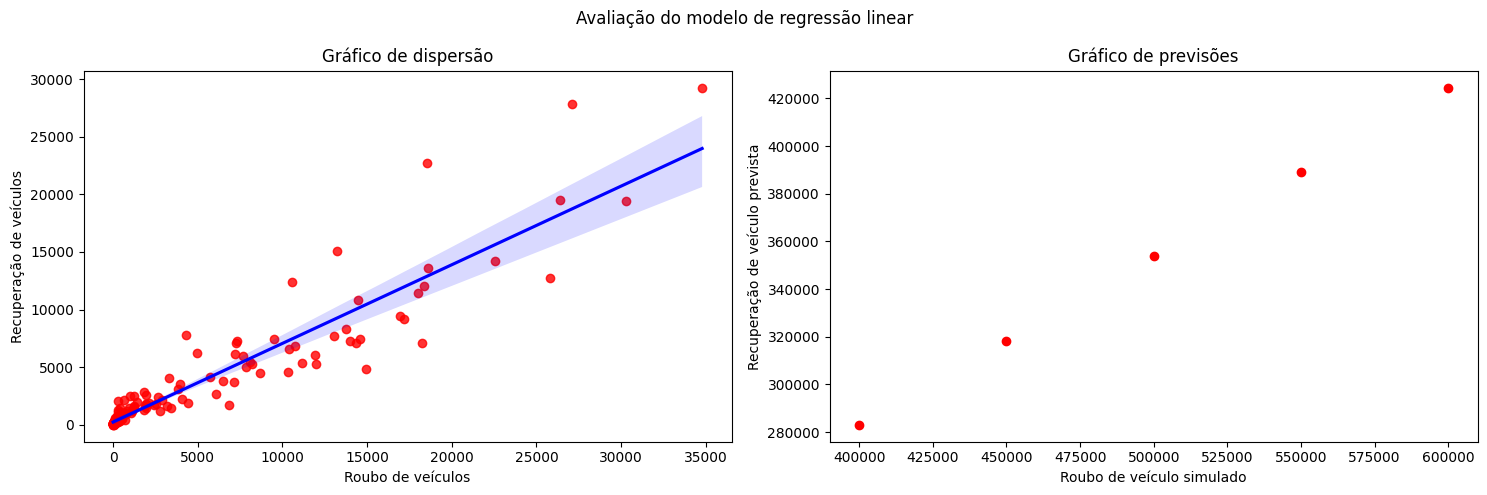

In [10]:
# visualização dos dados
import seaborn as sns

try:
    plt.subplots(1,2, figsize=(15,5))
    plt.suptitle('Avaliação do modelo de regressão linear')

    # posição 1: Gráfico de dispersão entre os arrays
    # avaliar a margem de confiança
    plt.subplot(1,2,1)

    sns.regplot(x=array_roubo_veiculo,y=array_recuperacao_veiculos, 
                color='red', line_kws={'color':'blue'})
    plt.title('Gráfico de dispersão')
    plt.xlabel('Roubo de veículos')
    plt.ylabel('Recuperação de veículos')

    # posição 2: Gráfico das previsões futuras
    plt.subplot(1,2,2)

    plt.scatter(array_roubo_veiculo_pred, recup_pred, color='red', label='Previsões')
    plt.title('Gráfico de previsões')
    plt.xlabel('Roubo de veículo simulado')
    plt.ylabel('Recuperação de veículo prevista')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print('Erro ao ao realizar a análise preditva: ', e) 